# The Importance of Torque in Robot Control - Stepper Motor Case

In this notebook, we explore the challenges of controlling a robot using stepper motors. These motors offer the advantage of precise position and velocity control, making them a convenient choice for many robotic applications.

However, a significant limitation is their inability to directly control the robot's dynamics through torque. This raises important considerations in control strategy design, particularly when dealing with interactions, external disturbances, or tasks requiring compliant behavior.


In [7]:
from robot_analysis.planar_nr import PlanarRobotNR, plot_final, animate_all
import numpy as np

## Robot Model Initialization
The PlanarRobotNR class allows the creation of a planar robot model with n revolute joints, including both its kinematics and dynamics.

In the following code, we define a simple robot with a single joint:

In [8]:
links = {
    'l': [1.0],  # Links lengths [m]
    'm': [1.0],  # Links masses [kg]
    'b': [1.0],  # Friction coefficients
}
robot = PlanarRobotNR(links)

Created robot with 1.
Kinematics: End effector positions are:
	xC=[l1*cos(q1(t))]
	y_C=[l1*sin(q1(t))]
Dynamics: M, C, G matrices are:
	M=Matrix([[1.0*l1**2*m1]])
	C=Matrix([[b1*Derivative(q1(t), t)]])
	G=Matrix([[9.81*l1*m1*cos(q1(t))]])


In [9]:
# Dynamical equation
robot.eqs_sym[0]

Eq(b1*Derivative(q1(t), t) + 1.0*l1**2*m1*Derivative(q1(t), (t, 2)) + 9.81*l1*m1*cos(q1(t)), tau1(t))

## Simulation with Stepper Motor (Open-Loop Control)

In this example, we perform **open-loop position control** to move the robot toward a target joint angle.

This is a typical use case of a **stepper motor**, where **position is controlled directly through a sequence of pulses**,  
but **the actual torque applied cannot be measured or dynamically regulated**.

This type of control is simple and cost-effective, but it comes with a major limitation:  
if the required torque exceeds the motor's capabilities (e.g., due to rapid acceleration, heavy loads, or friction),  
the motor will **miss steps**, causing the **final position to differ from the command**.

This results in a **residual position error**, which can be observed in the simulation results.

### Case 1 – Sufficient Torque
When the available torque is high enough, the robot reaches the target joint angle without difficulty.  
The final position error is zero, demonstrating that open-loop control works effectively under favorable conditions.

Finished simulation, generating animation...


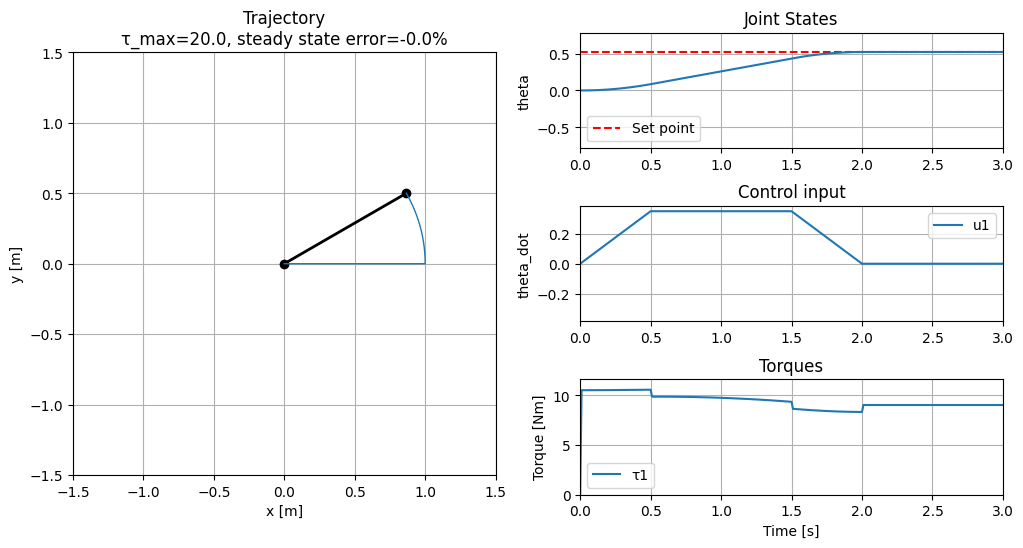

In [10]:
control_method = {
    'method': 'openloop',
    't1': 0.5,
    't2': 1.5,
    'tf': 2,
    'theta_d': np.array([np.pi / 6]),
    'tau_max': 20.0,
}
data = robot.simulate(x0=np.array([0.0, 0.0]), **control_method)

error = (1 - data['x_log'][-1, 0] / control_method['theta_d']) * 100
plot_final(
    error=error,
    theta_d=control_method['theta_d'],
    tau_max=control_method['tau_max'],
    **data,
)
# animate_all(error=error, theta_d = control_method['theta_d'], tau_max=control_method['tau_max'], **data)

### Case 2 – Torque Limited to 10.5 Nm  
The robot reaches a position close to the target, but we observe a **position error of approximately 7.2%**.  
Since this is a **stepper motor without angle feedback**, this error **cannot be corrected** automatically, which could be problematic for applications requiring high precision.


Finished simulation, generating animation...


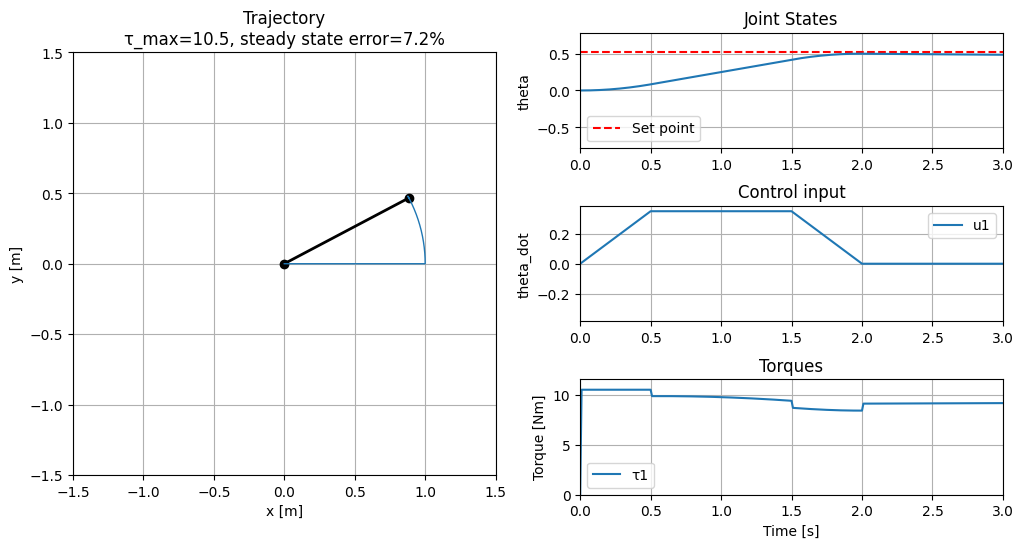

In [13]:
control_method['tau_max'] = 10.5
data = robot.simulate(x0=np.array([0.0, 0.0]), **control_method)

error = (1 - data['x_log'][-1, 0] / control_method['theta_d']) * 100
plot_final(
    error=error,
    theta_d=control_method['theta_d'],
    tau_max=control_method['tau_max'],
    **data,
)
# animate_all(error=error, theta_d = control_method['theta_d'], tau_max=control_method['tau_max'], **data)

### Case 3 – Insufficient Torque (10 Nm)  
The torque is not sufficient to overcome the inertia or the weight of the structure.  
The robotic arm **fails to move properly** and remains far from the target position.  
This is a clear example of **"step loss"**, which is typical for stepper motors when they are undersized or poorly driven.

Finished simulation, generating animation...


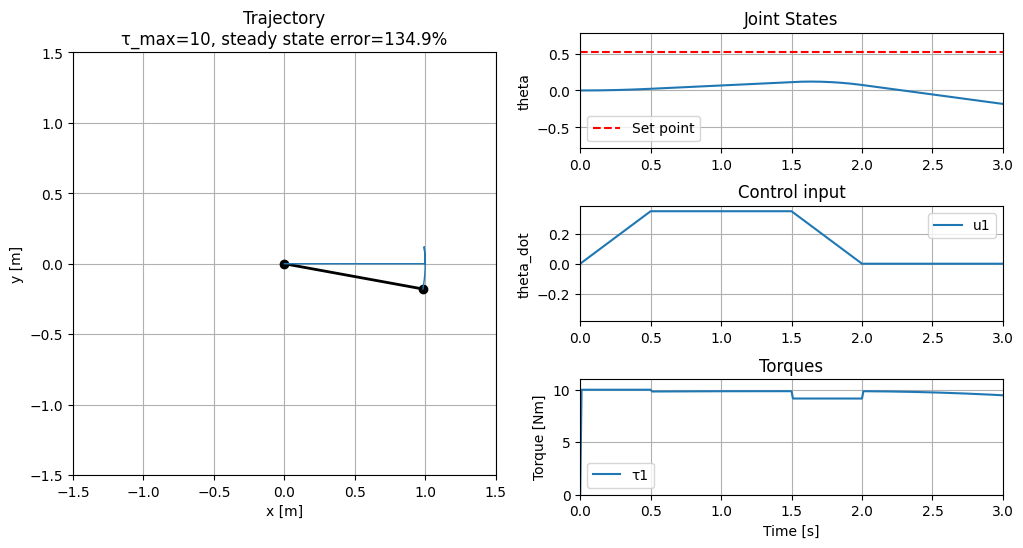

In [14]:
control_method['tau_max'] = 10
data = robot.simulate(x0=np.array([0.0, 0.0]), **control_method)

error = (1 - data['x_log'][-1, 0] / control_method['theta_d']) * 100
plot_final(
    error=error,
    theta_d=control_method['theta_d'],
    tau_max=control_method['tau_max'],
    **data,
)
# animate_all(error=error, theta_d = control_method['theta_d'], tau_max=control_method['tau_max'], **data)

## Conclusion

Open-loop control with stepper motors works well when torque is sufficient, but quickly shows its limits under load or dynamic conditions. Without feedback, missed steps lead to uncorrected position errors, making this approach unsuitable for precision tasks.

